<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_03_computer_vision_convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Computer Vision and Convolutional Neural Networks

In this notebook we're going to cover:
* Getting a dataset to work with
* Architecture of a convolutional neural network (CNN)
* And end-to-end binary image classification problem
* Steps in modeling with CNNs
* An end-to-end multiclass image classificatoin problem
* Making predicitons on our own custom images

# Get Food101 Data

In [1]:
# load library
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-03-14 06:15:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 74.125.129.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   100MB/s    in 1.0s    

2022-03-14 06:15:25 (100 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
# see how many files are in the steak and pizza folder
print(len(os.listdir("pizza_steak/train/steak")))
print(len(os.listdir("pizza_steak/train/pizza")))

750
750


In [4]:
# View an image
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


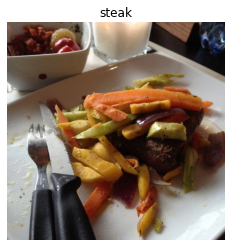

In [5]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="steak"
)

Image shape: (512, 512, 3)


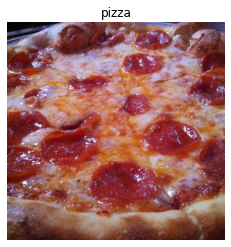

In [6]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="pizza"
)

In [7]:
# get tensor's shape
tf.constant(img).shape

TensorShape([512, 512, 3])

# An End-to-End Example

In [8]:
# set seed
tf.random.set_seed(42)

In [9]:
# preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# setup path
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [11]:
# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# build a CNN model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, kernel_size=3, activation='relu', 
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_0.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

hist_0 = model_0.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 27s 280ms/step - loss: 0.5471 - accuracy: 0.7247 - val_loss: 0.3533 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 13s 270ms/step - loss: 0.4053 - accuracy: 0.8240 - val_loss: 0.3439 - val_accuracy: 0.8820
Epoch 3/5
47/47 [==============================] - 24s 503ms/step - loss: 0.3928 - accuracy: 0.8267 - val_loss: 0.3330 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 14s 281ms/step - loss: 0.3552 - accuracy: 0.8440 - val_loss: 0.3710 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 12s 262ms/step - loss: 0.3265 - accuracy: 0.8673 - val_loss: 0.2974 - val_accuracy: 0.8760


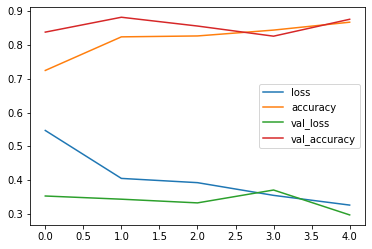

In [13]:
# plot losses
pd.DataFrame(hist_0.history).plot()
plt.show()

In [14]:
# view model
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# View & Preprocess Image Data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


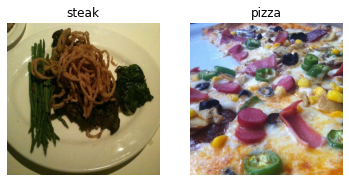

In [15]:
# view pizza vs steak images randomly
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [16]:
# define directory datasewt paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [17]:
# create train and test data generator and rescale the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
# get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [20]:
# how many batches are there?
len(train_data), 1500/32

(47, 46.875)

In [21]:
# check image
images[0]

array([[[0.42352945, 0.43137258, 0.34509805],
        [0.31764707, 0.3254902 , 0.2392157 ],
        [0.26666668, 0.28235295, 0.18431373],
        ...,
        [0.42352945, 0.34901962, 0.37254903],
        [0.427451  , 0.34901962, 0.39607847],
        [0.45098042, 0.36862746, 0.427451  ]],

       [[0.2901961 , 0.30588236, 0.21568629],
        [0.45882356, 0.47450984, 0.37647063],
        [0.2627451 , 0.28627452, 0.18431373],
        ...,
        [0.39607847, 0.34117648, 0.34117648],
        [0.4156863 , 0.36862746, 0.37647063],
        [0.39607847, 0.34901962, 0.3647059 ]],

       [[0.37254903, 0.39607847, 0.29411766],
        [0.39607847, 0.41960788, 0.31764707],
        [0.30588236, 0.34117648, 0.23529413],
        ...,
        [0.34509805, 0.3254902 , 0.3019608 ],
        [0.30980393, 0.29803923, 0.27058825],
        [0.3372549 , 0.3254902 , 0.30588236]],

       ...,

       [[0.5137255 , 0.5019608 , 0.54509807],
        [0.52156866, 0.50980395, 0.54509807],
        [0.5294118 , 0

In [22]:
# see what first batch of label look slike
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

# Create A Baseline CNN Model

CNN parameters:
* filters: decides how many filters should pass over an input tensor (e.g. sliding windows over an image)
* kernel_size: determines the shape of the filters (sliding windows) over the output
* padding: pads the target tensor with zeroes (if `"same"`) to preserve input shape, or leaves in the target tensor as is (if `"valid"`), lowering output shape
* strides: the nubmer of steps a filter takes across an image at a time (e.g. if `strides=1`, a filter moves across an image 1 pixel at a time)

In [23]:
# create a simple baseline model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, # number of moving windows
        kernel_size=3, # size per window
        strides=1, # steps each window takes
        padding="valid", # condensed output
        activation="relu",
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [24]:
# compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [25]:
# get summary of model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit the model
hist_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 14s 268ms/step - loss: 0.9192 - accuracy: 0.6987 - val_loss: 0.4375 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 12s 254ms/step - loss: 0.4159 - accuracy: 0.8207 - val_loss: 0.3754 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 12s 256ms/step - loss: 0.2925 - accuracy: 0.8907 - val_loss: 0.3722 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 12s 260ms/step - loss: 0.1527 - accuracy: 0.9507 - val_loss: 0.3515 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 12s 259ms/step - loss: 0.0638 - accuracy: 0.9853 - val_loss: 0.4223 - val_accuracy: 0.8100


In [27]:
# evaluate baseline model
model_1.evaluate(test_data)

16/16 [==============================] - 3s 179ms/step - loss: 0.4223 - accuracy: 0.8100


[0.42226317524909973, 0.8100000023841858]

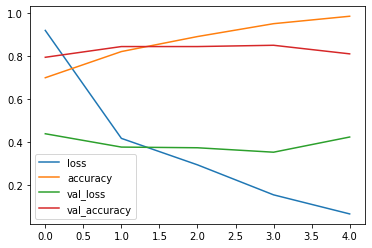

In [28]:
# plot history
pd.DataFrame(hist_1.history).plot()
plt.show()

In [31]:
# plot loss and accruacy separately using a function
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    fit, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
    ax[0].plot(epochs, loss, label='training_loss')
    ax[0].plot(epochs, val_loss, label='val_loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    ax[1].plot(epochs, accuracy, label='training_accuracy')
    ax[1].plot(epochs, val_accuracy, label='val_accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    plt.tight_layout()
    plt.show()

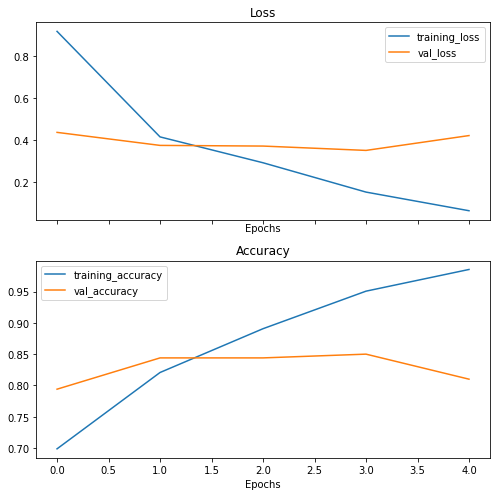

In [32]:
# plot loss and accuracy of model_1
plot_loss_curves(hist_1)

# Reducing Overfitting: Max Pooling

In [33]:
# one way to do that for CNN is with MaxPooling
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [36]:
# compile and fit
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

hist_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 14s 246ms/step - loss: 0.6094 - accuracy: 0.6520 - val_loss: 0.5478 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4604 - accuracy: 0.7853 - val_loss: 0.4025 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4193 - accuracy: 0.8160 - val_loss: 0.3618 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3931 - accuracy: 0.8260 - val_loss: 0.3325 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3910 - accuracy: 0.8347 - val_loss: 0.3512 - val_accuracy: 0.8480


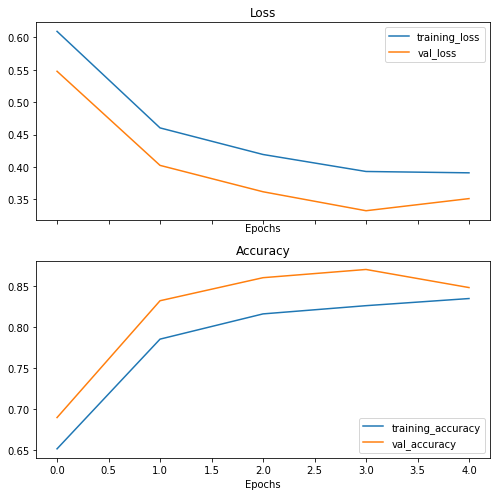

In [37]:
# view loss with model_2
plot_loss_curves(hist_2)

In [38]:
# evaluate model_2
model_2.evaluate(test_data)

16/16 [==============================] - 3s 203ms/step - loss: 0.3512 - accuracy: 0.8480


[0.35123229026794434, 0.8479999899864197]

# Reducing Overfitting: Data Augmentation

Increase the diversity of your training dataset without collecting more data (e.g. take your photos of pizza and randomly rotate them 30 degrees). Increase diversity forces a model to learn more generalization patterns. Data augmentation is usually only performed on the training data.

In [74]:
# create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)

train_datagen = ImageDataGenerator(rescale=1/255.) 
test_datagen = ImageDataGenerator(rescale=1/255.)

In [75]:
# create data from datagen, augmented vs unaugmented
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False # for purpose of demonstration & comparison
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [76]:
# visualize
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

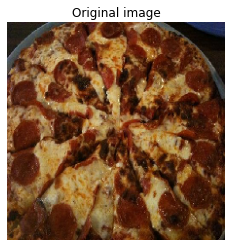

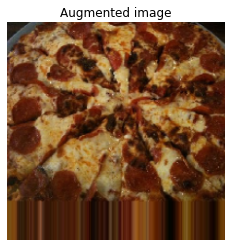

In [77]:
# show original
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

# Train Model with Augmented Data

In [72]:
# build, compile, fit with augmented data
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

hist_3 = model_3.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 28s 582ms/step - loss: 0.7269 - accuracy: 0.5053 - val_loss: 0.6802 - val_accuracy: 0.5460
Epoch 2/5
47/47 [==============================] - 27s 582ms/step - loss: 0.6910 - accuracy: 0.5120 - val_loss: 0.6690 - val_accuracy: 0.6720
Epoch 3/5
47/47 [==============================] - 28s 586ms/step - loss: 0.6763 - accuracy: 0.5793 - val_loss: 0.6667 - val_accuracy: 0.5700
Epoch 4/5
47/47 [==============================] - 28s 593ms/step - loss: 0.6989 - accuracy: 0.5053 - val_loss: 0.6419 - val_accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 28s 599ms/step - loss: 0.6795 - accuracy: 0.6080 - val_loss: 0.6575 - val_accuracy: 0.5080


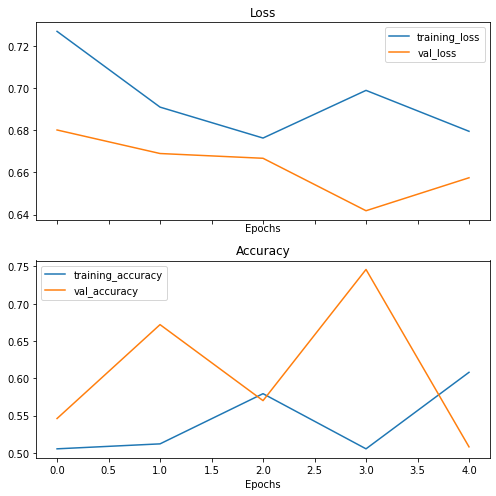

In [73]:
# ran longer and performed poorer
plot_loss_curves(hist_3)

In [80]:
# recreate datagens with shuffle back on
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 1500 images belonging to 2 classes.


In [81]:
# build, compile, fit with augmented data
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

hist_4 = model_4.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 30s 618ms/step - loss: 0.6569 - accuracy: 0.6040 - val_loss: 0.5506 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 30s 637ms/step - loss: 0.5999 - accuracy: 0.6987 - val_loss: 0.4489 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 27s 574ms/step - loss: 0.5729 - accuracy: 0.7253 - val_loss: 0.4173 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 27s 579ms/step - loss: 0.5655 - accuracy: 0.7220 - val_loss: 0.4541 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 27s 579ms/step - loss: 0.5420 - accuracy: 0.7413 - val_loss: 0.3874 - val_accuracy: 0.8220


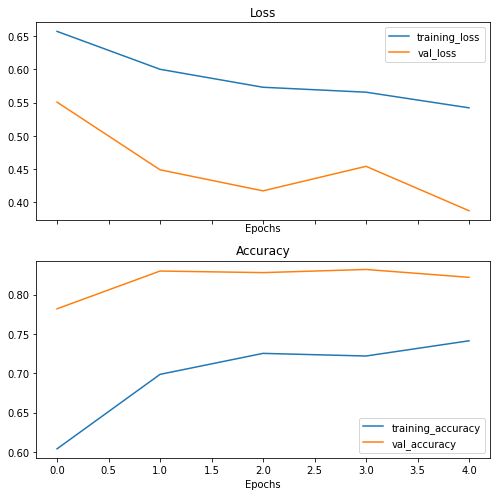

In [82]:
# view curves again -- much better
plot_loss_curves(hist_4)